# Kernel herding examples
The aim of this notebook is to provide simple examples to apply kernel herding on multivariate random inputs with or without a dependency structure.

In [1]:
%matplotlib inline

In [2]:
import openturns as ot
import otkerneldesign as otkd
from plotools import *

## Independent bivariate random mixture

In [3]:
# Random input variable definition
# Here a random mixture
modes = [ot.Normal(0.3, 0.12), ot.Normal(0.7, 0.1)]
weight = [0.4, 1.0]
mixture = ot.Mixture(modes, weight)
normal = ot.Normal(0.6, 0.15)
distribution = ot.ComposedDistribution([mixture, normal])

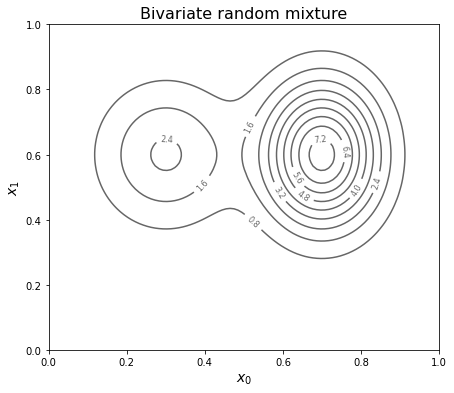

In [4]:
d = DrawFunctions()
fig = d.draw_2D_controur('Bivariate random mixture', None, distribution)
fig;

In [5]:
dimension = distribution.getDimension()
size = 20
# Monte Carlo design
mc_design = distribution.getSample(size)
# Kernel definition
ker_list = [ot.MaternModel([0.1], [1.0], 2.5)] * dimension
kernel = ot.ProductCovarianceModel(ker_list)
# Kernel herding design
kh = otkd.KernelHerding(
    kernel=kernel,
    candidate_set_size=2 ** 12,
    distribution=distribution
)
kh_design, _ = kh.select_design(size)
# Tensorized kernel herding design
kht = otkd.KernelHerdingTensorized(
    kernel=kernel,
    candidate_set_size=2 ** 12,
    distribution=distribution
)
kht_design, _ = kh.select_design(size)

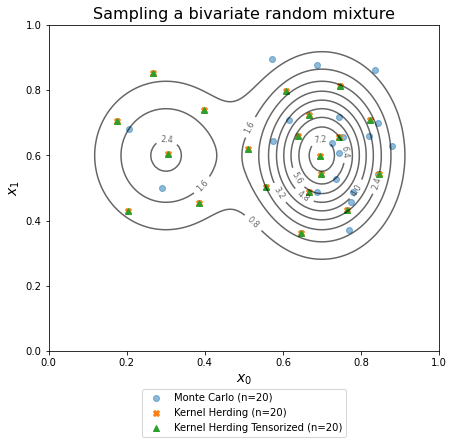

In [6]:
fig = d.draw_2D_controur('Sampling a bivariate random mixture', None, distribution)
plt.scatter(mc_design[:, 0], mc_design[:, 1], label='Monte Carlo (n={})'.format(size), marker='o', alpha=0.5)
plt.scatter(kh_design[:, 0], kh_design[:, 1], label='Kernel Herding (n={})'.format(size), marker='X', color='C1')
plt.scatter(kht_design[:, 0], kht_design[:, 1], label='Kernel Herding Tensorized (n={})'.format(size), marker='^', color='C2')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center');

## Dependent bivariate random mixture
Using the same example, we can add a Copula as a dependency structure. Note that the KernelHerdingTensorized class cannot be used in this case. 

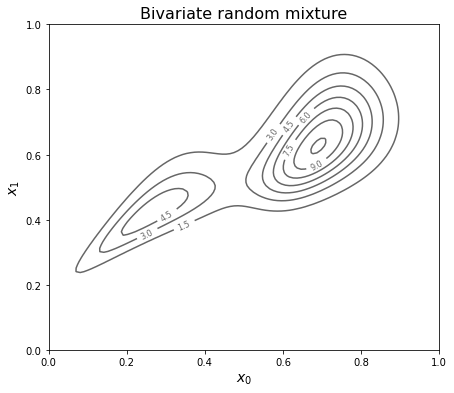

In [7]:
distribution.setCopula(ot.ClaytonCopula(2.))
fig = d.draw_2D_controur('Bivariate random mixture', None, distribution)
fig;

In [8]:
# Monte Carlo design
mc_design = distribution.getSample(size)
# Kernel herding design
kh = otkd.KernelHerding(
    kernel=kernel,
    candidate_set_size=2 ** 12,
    distribution=distribution
)
kh_design, _ = kh.select_design(size)

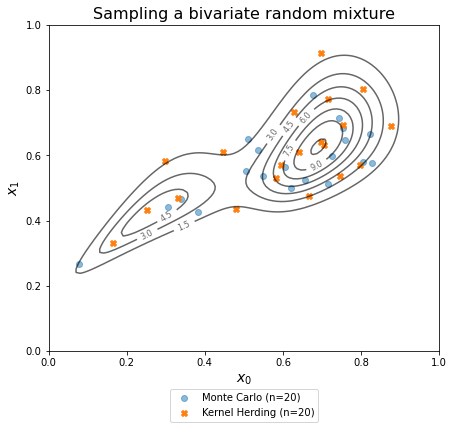

In [9]:
fig = d.draw_2D_controur('Sampling a bivariate random mixture', None, distribution)
plt.scatter(mc_design[:, 0], mc_design[:, 1], label='Monte Carlo (n={})'.format(size), marker='o', alpha=0.5)
plt.scatter(kh_design[:, 0], kh_design[:, 1], label='Kernel Herding (n={})'.format(size), marker='X', color='C1')
plt.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center');